In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import os
import plotly.io as pio
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
import geopandas as gpd

In [3]:
df = pd.read_csv('output.csv')
df

,Year,Country of Asylum,Area,Country of Origin,Refugee Status Type,Category,Recognized Cases,Rejected Cases,Pending Cases,Total Applications,...,Female 60+,F: Unknown,Male 0-4,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Females,Total Males,Total Population
0,2000,Zimbabwe,0,Afghanistan,G / FI,Refugees (incl. refugee-like situations),5,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,2000,South Africa,0,Afghanistan,G / FI,Asylum-seekers,0,0,8,8,...,0,0,0,0,0,0,0,0,0,0
2,2000,South Africa,0,Afghanistan,G / FI,Refugees (incl. refugee-like situations),0,0,8,8,...,0,0,0,0,0,0,0,0,0,0
3,2000,Uzbekistan,0,Afghanistan,U / FI,Asylum-seekers,747,112,1235,2094,...,0,0,0,0,0,0,0,0,0,0
4,2000,Uzbekistan,0,Afghanistan,U / FI,Refugees (incl. refugee-like situations),747,112,1235,2094,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961542,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Others of concern,0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961543,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Returned IDPs,0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961544,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Refugees (incl. refugee-like situations),0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961545,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Returnees,0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404


In [4]:
df_modified = df.drop(['Category', 'Area'], axis=1)

In [5]:
df_modified

,Year,Country of Asylum,Country of Origin,Refugee Status Type,Recognized Cases,Rejected Cases,Pending Cases,Total Applications,Female 0-4,Female 5-17,...,Female 60+,F: Unknown,Male 0-4,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Females,Total Males,Total Population
0,2000,Zimbabwe,Afghanistan,G / FI,5,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,South Africa,Afghanistan,G / FI,0,0,8,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,South Africa,Afghanistan,G / FI,0,0,8,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,Uzbekistan,Afghanistan,U / FI,747,112,1235,2094,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,Uzbekistan,Afghanistan,U / FI,747,112,1235,2094,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961542,2016,Zambia,Zimbabwe,G / FI,0,0,0,0,637,2423,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961543,2016,Zambia,Zimbabwe,G / FI,0,0,0,0,637,2423,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961544,2016,Zambia,Zimbabwe,G / FI,0,0,0,0,637,2423,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961545,2016,Zambia,Zimbabwe,G / FI,0,0,0,0,637,2423,...,400,0,602,2332,2786,512,0,6172,6232,12404


In [6]:
df_unique = df_modified.drop_duplicates()
df_unique

,Year,Country of Asylum,Country of Origin,Refugee Status Type,Recognized Cases,Rejected Cases,Pending Cases,Total Applications,Female 0-4,Female 5-17,...,Female 60+,F: Unknown,Male 0-4,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Females,Total Males,Total Population
0,2000,Zimbabwe,Afghanistan,G / FI,5,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,South Africa,Afghanistan,G / FI,0,0,8,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,Uzbekistan,Afghanistan,U / FI,747,112,1235,2094,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2000,United States of America,Afghanistan,G / EO,151,31,171,353,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2000,United States of America,Afghanistan,G / IN,182,51,150,383,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961512,2016,South Africa,Zimbabwe,G / FI,73,7869,41260,49202,0,0,...,0,0,0,0,0,0,0,0,0,0
6961519,2016,Zambia,Zimbabwe,G / FI,0,0,0,0,324,1452,...,109,0,279,1469,4670,207,0,4554,6625,11179
6961526,2016,Zambia,Zimbabwe,G / FI,0,0,0,0,983,2390,...,157,0,982,2319,3202,326,0,6408,6829,13237
6961533,2016,Zambia,Zimbabwe,G / FI,0,0,0,0,1248,3962,...,300,0,1205,4060,4963,467,0,9692,10695,20387


## Plot: Top Ten Countries with the Most Migrants Flow (2015)

In [7]:
df_new_1 = df_unique.drop(['Refugee Status Type', 'Recognized Cases' , 'Rejected Cases' , 'Pending Cases' , 'Total Applications', 
                           'Female 0-4' , 'Female 5-17' , 'Female 18-59', 'Female 60+', 'F: Unknown' , 
                           'Male 0-4' , 'Male 5-17' , 'Male 18-59' , 'Male 60+' , 'M: Unknown' , 'Total Females' , 'Total Males'], axis=1)

In [8]:
df_new_1.drop_duplicates()

,Year,Country of Asylum,Country of Origin,Total Population
0,2000,Zimbabwe,Afghanistan,0
1,2000,South Africa,Afghanistan,0
3,2000,Uzbekistan,Afghanistan,0
5,2000,United States of America,Afghanistan,0
9,2000,Ukraine,Afghanistan,0
...,...,...,...,...
6961505,2016,South Africa,Zimbabwe,0
6961519,2016,Zambia,Zimbabwe,11179
6961526,2016,Zambia,Zimbabwe,13237
6961533,2016,Zambia,Zimbabwe,20387


In [9]:
df_2015 = df_new_1[df_unique['Year'] == 2015]
df_2015

,Year,Country of Asylum,Country of Origin,Total Population
3900846,2015,United States of America,Afghanistan,0
3900853,2015,United States of America,Afghanistan,0
3900860,2015,South Africa,Afghanistan,0
3900867,2015,South Africa,Afghanistan,0
3900874,2015,Pakistan,Afghanistan,4228
...,...,...,...,...
5881135,2015,Norway,Zimbabwe,0
5881142,2015,Norway,Zimbabwe,0
5881149,2015,Norway,Zimbabwe,0
5881156,2015,Angola,Zimbabwe,0


In [10]:
df_2015.drop_duplicates()
df_2015

,Year,Country of Asylum,Country of Origin,Total Population
3900846,2015,United States of America,Afghanistan,0
3900853,2015,United States of America,Afghanistan,0
3900860,2015,South Africa,Afghanistan,0
3900867,2015,South Africa,Afghanistan,0
3900874,2015,Pakistan,Afghanistan,4228
...,...,...,...,...
5881135,2015,Norway,Zimbabwe,0
5881142,2015,Norway,Zimbabwe,0
5881149,2015,Norway,Zimbabwe,0
5881156,2015,Angola,Zimbabwe,0


In [11]:
grouped = df_2015.groupby('Country of Origin')['Total Population'].sum()

In [12]:
top_countries = grouped.nlargest(20)

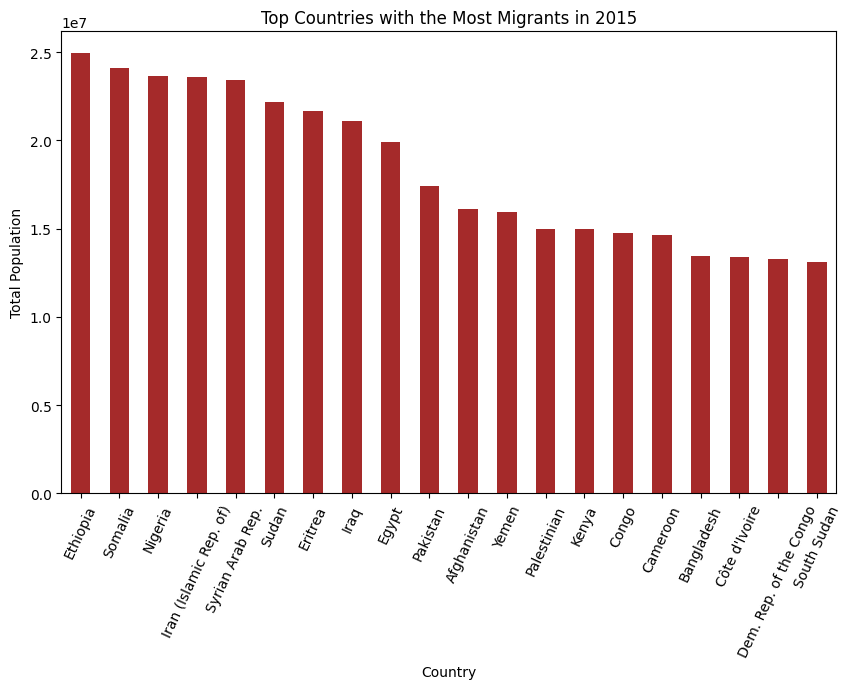

In [13]:
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='brown')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.title('Top Countries with the Most Migrants in 2015')
plt.xticks(rotation=65)
plt.show()

## Plot: Top Ten Countries of Asylum with the Most Migrants (2015)

In [14]:
df_new_2 = df_unique.drop(['Refugee Status Type', 'Recognized Cases' , 'Rejected Cases' , 'Pending Cases' , 'Total Applications', 
                           'Female 0-4' , 'Female 5-17' , 'Female 18-59', 'Female 60+', 'F: Unknown' , 
                           'Male 0-4' , 'Male 5-17' , 'Male 18-59' , 'Male 60+' , 'M: Unknown' , 'Total Females' , 'Total Males'], axis=1)

In [15]:
df_new_2.drop_duplicates()

,Year,Country of Asylum,Country of Origin,Total Population
0,2000,Zimbabwe,Afghanistan,0
1,2000,South Africa,Afghanistan,0
3,2000,Uzbekistan,Afghanistan,0
5,2000,United States of America,Afghanistan,0
9,2000,Ukraine,Afghanistan,0
...,...,...,...,...
6961505,2016,South Africa,Zimbabwe,0
6961519,2016,Zambia,Zimbabwe,11179
6961526,2016,Zambia,Zimbabwe,13237
6961533,2016,Zambia,Zimbabwe,20387


In [29]:
df_2015_2 = df_new_2[df_unique['Year'] == 2015]
df_2015_2

,Year,Country of Asylum,Country of Origin,Total Population
3900846,2015,United States of America,Afghanistan,0
3900853,2015,United States of America,Afghanistan,0
3900860,2015,South Africa,Afghanistan,0
3900867,2015,South Africa,Afghanistan,0
3900874,2015,Pakistan,Afghanistan,4228
...,...,...,...,...
5881135,2015,Norway,Zimbabwe,0
5881142,2015,Norway,Zimbabwe,0
5881149,2015,Norway,Zimbabwe,0
5881156,2015,Angola,Zimbabwe,0


In [35]:
grouped_df = df_2015_2.groupby('Country of Asylum')['Total Population'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Total Population', ascending=False)
top_ten = sorted_df.head(10)


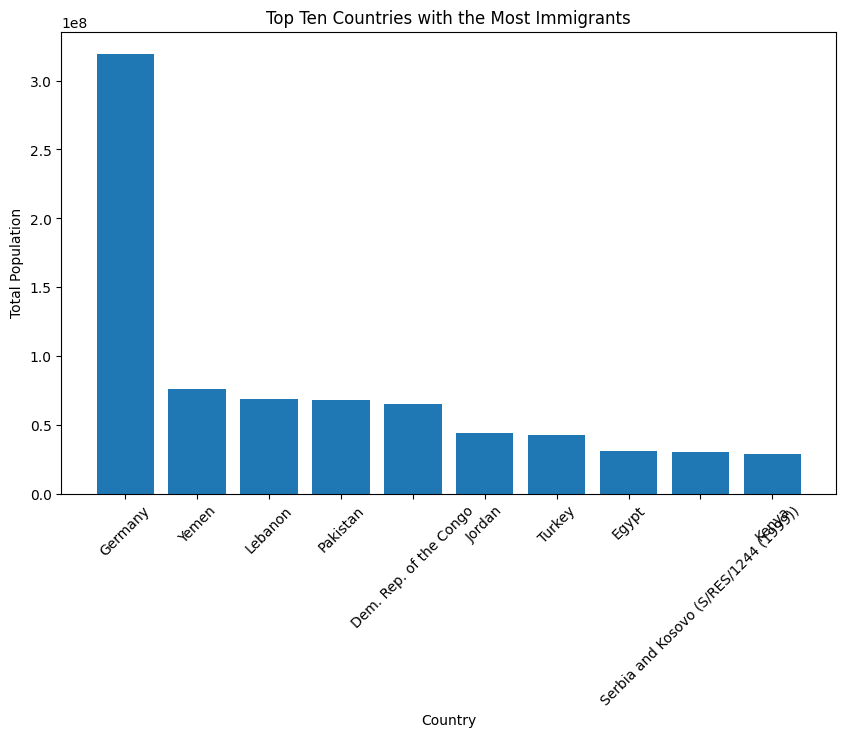

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten['Country of Asylum'], top_ten['Total Population'])
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.title('Top Ten Countries with the Most Immigrants')
plt.xticks(rotation=45)
plt.show()